In this notebook, we will plot the results of the experiments comparing the alternative
 methods for fitting the LCEGP model under the purely categorical R&S setting.

# TODO: why is it still this variable despite 30 replications? Look into replication by
 replication behavior.

In [17]:
import json
import os

import torch
from torch import Tensor

%matplotlib inline
import matplotlib.pyplot as plt

# current_dir = os.path.dirname(os.path.abspath(__file__))
current_dir = os.getcwd()

labels = ["standard", "0-2", "0.1-2", "0-5", "0.1-5", "0-10", "0.1-10"]
label_count = len(labels)


def plot_experiment(dirname: str, plot_idcs: list = None) -> Tensor:
    exp_dir = os.path.join(current_dir, dirname)
    config_path = os.path.join(exp_dir, "config.json")

    with open(config_path, "r") as f:
        config_dict = json.load(f)
        print(f"Config: \n {json.dumps(config_dict, indent=4)}")

    # get all the output files
    directory_list = os.listdir(exp_dir)
    output_files = [
        os.path.join(exp_dir, file) for file in directory_list if file[-3:] == ".pt"
    ]

    # read all outputs into a list
    output_dicts = list()
    for file_path in output_files:
        output_dicts.append(torch.load(file_path))
    output_count = len(output_dicts)
    print(f"Read {output_count} output files.")

    # plot final values, averaged over replications.
    # final values is a list of tensors, one tensor per label
    key = "final_values"
    final_value_shape = output_dicts[0][key][0].shape
    all_results = torch.zeros(label_count, output_count, *final_value_shape)

    for j, out_dict in enumerate(output_dicts):
        for i in range(label_count):
            all_results[i, j] = out_dict[key][i].cpu()

    # average to get the plot values
    plot_values = all_results.mean(dim=1)

    # plot
    fig = plt.figure(figsize=(12, 8))
    fig.patch.set_facecolor('xkcd:mint green')
    if plot_idcs is None:
        plot_idcs = list(range(label_count))

    for i in plot_idcs:
        plt.plot(plot_values[i], label=labels[i])
    plt.grid()
    plt.legend()
    plt.show()
    return all_results


Config: 
 {
    "num_alternatives": 5,
    "rho": 0.5,
    "num_full_train": 3,
    "iterations": 100,
    "fit_frequency": 5
}
Read 100 output files.


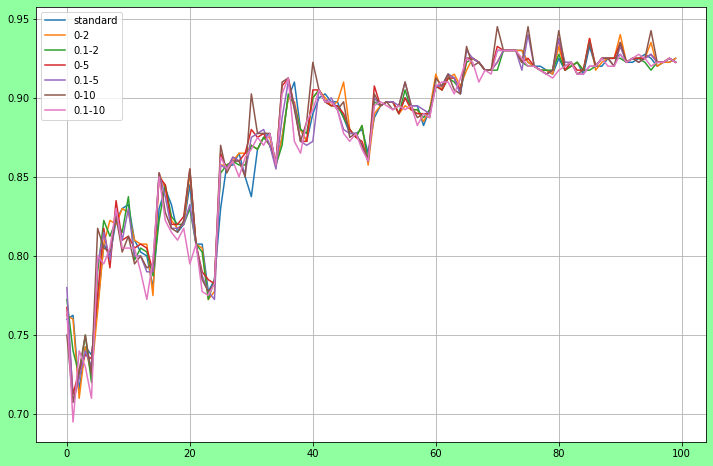

In [2]:
_ = plot_experiment("config_1")

Config: 
 {
    "num_alternatives": 5,
    "rho": 0.5,
    "num_full_train": 3,
    "iterations": 100,
    "fit_frequency": 5
}
Read 100 output files.


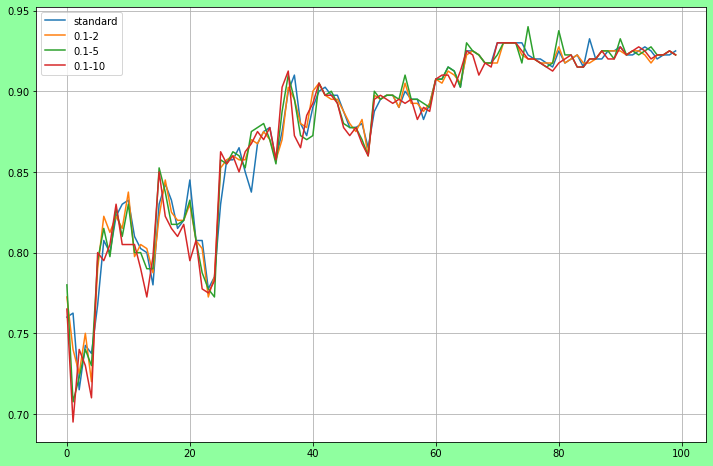

In [3]:
_ = plot_experiment("config_1", [0, 2, 4, 6])

Config: 
 {
    "num_alternatives": 10,
    "rho": 0.7,
    "num_full_train": 3,
    "iterations": 200,
    "fit_frequency": 5
}
Read 98 output files.


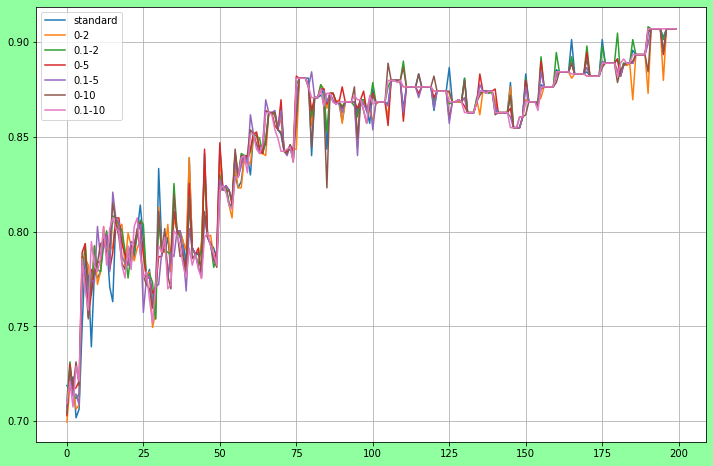

In [4]:
_ = plot_experiment("config_2")

Config: 
 {
    "num_alternatives": 10,
    "rho": 0.7,
    "num_full_train": 3,
    "iterations": 200,
    "fit_frequency": 5
}
Read 98 output files.


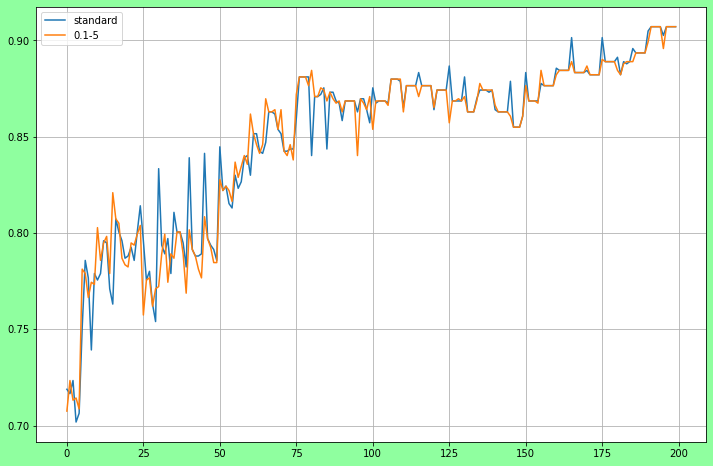

In [15]:
_ = plot_experiment("config_2", [0, 4])


Config: 
 {
    "num_alternatives": 20,
    "rho": 0.3,
    "num_full_train": 5,
    "iterations": 100,
    "fit_frequency": 5,
    "emb_dim": 2
}
Read 94 output files.


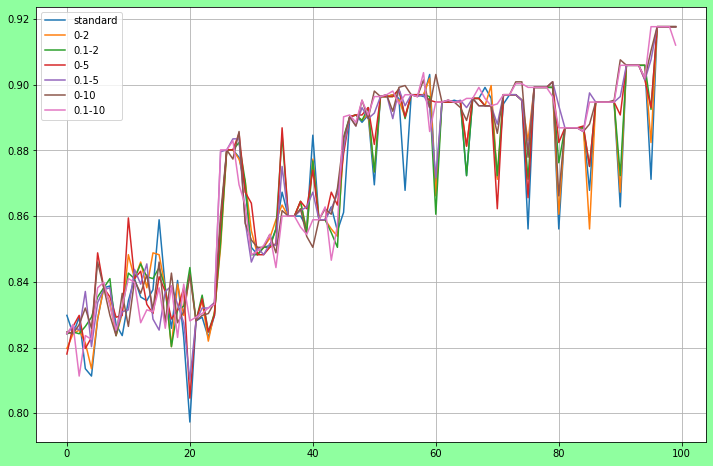

In [6]:
_ = plot_experiment("config_3")

Config: 
 {
    "num_alternatives": 20,
    "rho": 0.3,
    "num_full_train": 5,
    "iterations": 100,
    "fit_frequency": 5,
    "emb_dim": 2
}
Read 94 output files.


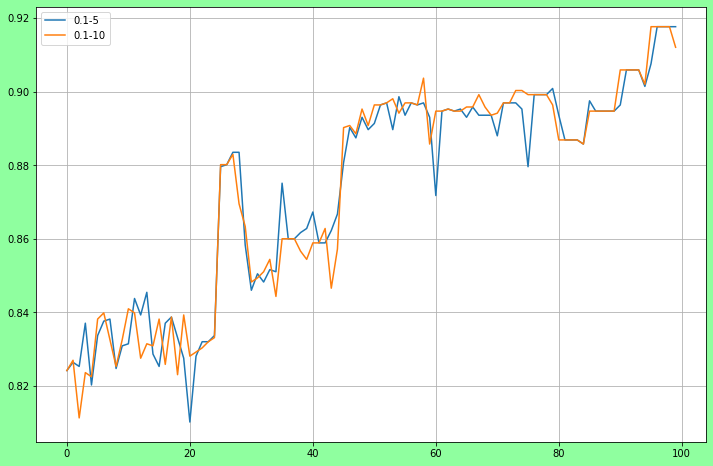

In [14]:
_ = plot_experiment("config_3", [4, 6,])


Let's also take a closer look by plotting replication by replication.

Config: 
 {
    "num_alternatives": 20,
    "rho": 0.3,
    "num_full_train": 5,
    "iterations": 100,
    "fit_frequency": 5,
    "emb_dim": 2
}
Read 96 output files.


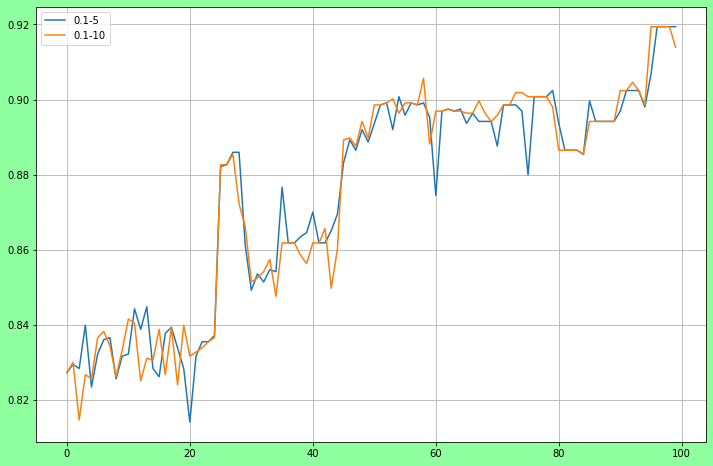

In [20]:
all_results = plot_experiment("config_3", [4, 6,])

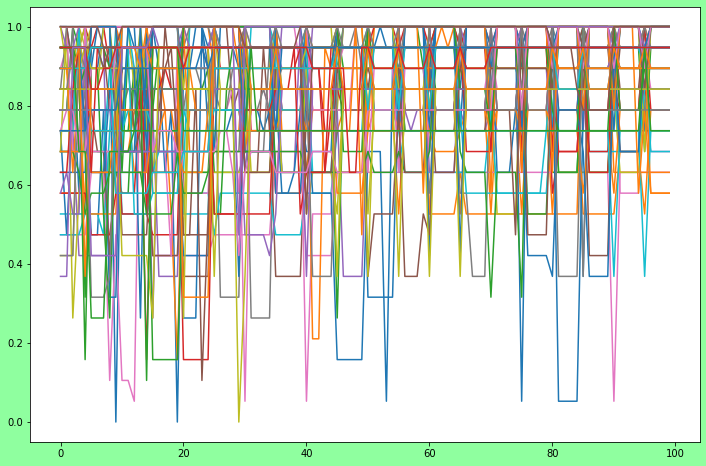

In [21]:
# plot 4th setting
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('xkcd:mint green')

for i in range(all_results.shape[1]):
    plt.plot(all_results[4, i])
plt.show()

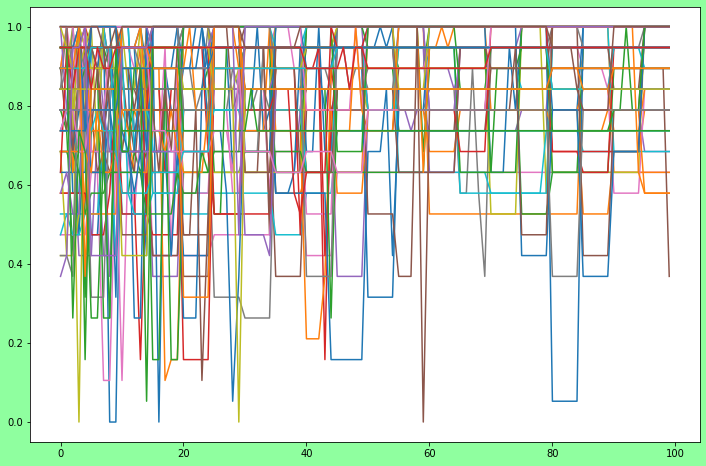

In [22]:
# plot 6th setting
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('xkcd:mint green')

for i in range(all_results.shape[1]):
    plt.plot(all_results[6, i])
plt.show()

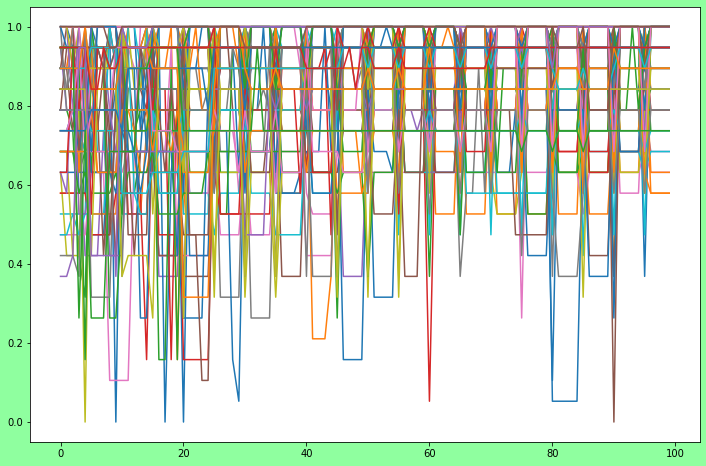

In [23]:
# plot 0th setting
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('xkcd:mint green')

for i in range(all_results.shape[1]):
    plt.plot(all_results[0, i])
plt.show()

To put it into numbers, let's look at the mean and standard deviations.

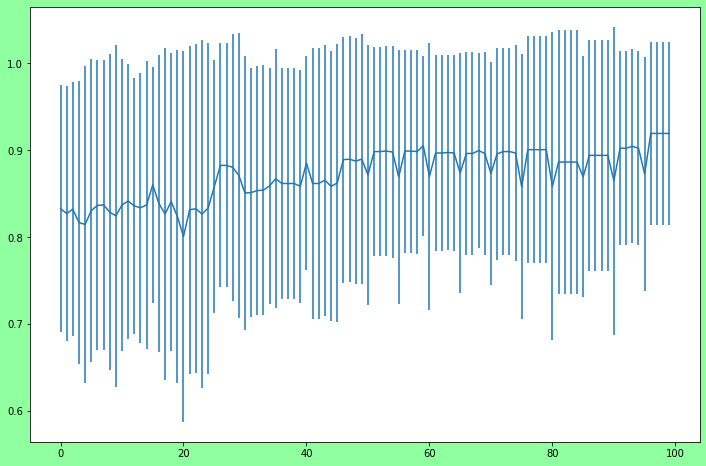

In [25]:
means = all_results.mean(dim=1)
stds = all_results.std(dim=1)

In [ ]:
# plot 0th setting
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('xkcd:mint green')

plt.errorbar(torch.arange(100), means[0], stds[0])
plt.show()


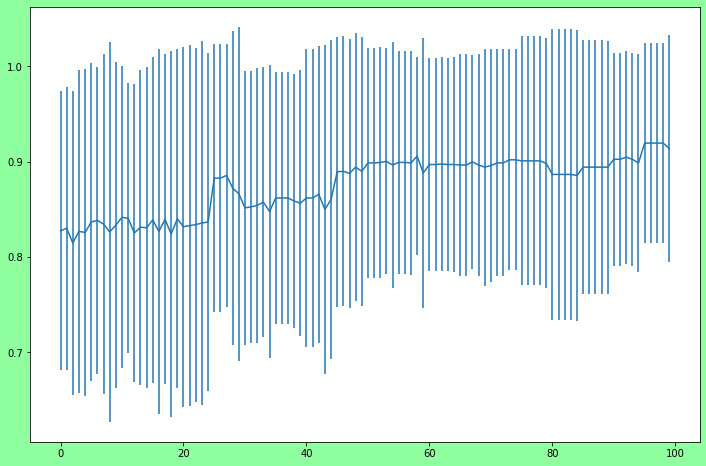

In [27]:
# plot 6th setting
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('xkcd:mint green')

plt.errorbar(torch.arange(100), means[6], stds[6])
plt.show()

It does indeed look more stable.

Let's check the averages of means and standard deviations across all iterations.

In [28]:
print(f"Average means: {means.mean(dim=-1)}")
print(f"Average stds: {stds.mean(dim=-1)}")

Average means: tensor([0.8715, 0.8729, 0.8733, 0.8742, 0.8745, 0.8746, 0.8746])
Average stds: tensor([0.1428, 0.1413, 0.1414, 0.1413, 0.1418, 0.1406, 0.1409])


Yes, there's indeed some improvement. Is it worth bothering with the extra cost?
Probably not.